In [89]:
%matplotlib notebook
import numpy as np
import numpy.random as npr
from numpy import linalg as LA
import matplotlib.pyplot as plt



In [164]:
def MR(N, g, index):
    p = 0.1
    per = np.zeros([1, int(N/2)])
#     radius = np.array([g,g,g,g])
    radius = np.array([0.82, 0.91,  0.99, 1.28]) * g* 0.89
    num_circles = radius.size
    partition_out = 0.01
    partition_in = 1 - partition_out
    distance_thresold = 1.15
    if radius[num_circles-1] > 1.9:
        per_out = np.ones([1,1]) * partition_out * N/2
        per_in = np.zeros([1, num_circles - 1])
        radius_in = radius[:-1]
        distance = np.absolute(radius_in - distance_thresold)
        percentage = np.tanh(-2 * distance) + 1
        percentage_normalized = percentage / np.sum(percentage)
        for i in range(num_circles - 2):
            a = np.maximum(np.floor(percentage_normalized[i] * N/2), 0.1 * N/2)
            per_in[0][i] = a
        per_in[0][-1] = partition_in * N/2 - np.sum(per_in)          
        per = np.concatenate((per_in, per_out), axis=1)
    else:
        radius_in = radius
        per = np.zeros([1,num_circles])
        distance = np.absolute(radius_in - distance_thresold)
        percentage = np.tanh(-2 * distance) + 1
        percentage_normalized = percentage / np.sum(percentage)
        for i in range(num_circles -1):
            per[0,i] = np.floor(percentage_normalized[i] * N/2)
        
        per[0,-1] = N/2 - np.sum(per)   
    count = 0
    theta = np.zeros([1, int(N/2)])
    real_part = np.zeros([1, int(N/2)])
    imag_part_pos = np.zeros([1, int(N/2)])
    for i  in range(num_circles - 1):
        theta[0,count: count + int(per[0,i])] = np.linspace( np.pi * i / (num_circles - 1),  np.pi * (i+1) / (num_circles - 1) , num = int(per[0][i]))
        real_part[0,count: count + int(per[0,i])]= radius[i] * np.cos(theta[0,count: count + int(per[0,i])]);
        imag_part_pos[0,count: count + int(per[0,i])]= radius[i] * np.sin(theta[0,count: count + int(per[0,i])]);
        count = count + int(per[0][i])
    
    i = num_circles - 1
    theta[0,count: count + int(per[0,i])] = np.linspace(0,  0.4 * np.pi / (num_circles - 1), num = int(per[0,i]))
    real_part[0,count: count + int(per[0,i])]= radius[i] * np.cos(theta[0,count: count + int(per[0,i])]);
    imag_part_pos[0,count: count + int(per[0,i])]= radius[i] * np.sin(theta[0,count: count + int(per[0,i])]);
    count = count + int(per[0][i])
    imag_part_neg = - imag_part_pos;
    
    Temp = np.random.normal(0,1,[N,N])

    Temp = Temp - np.transpose(Temp)
    
    [D,V] = LA.eig(Temp)
    
        
    eig_val = np.zeros([N]) * 1j

    M = np.zeros([N,N]) * 1j
    

    for i in range(int(N/2)):
        eig_val[2*i] = real_part[0,i] + 1j * imag_part_pos[0,i]
        eig_val[2*i + 1] = real_part[0,i] + 1j * imag_part_neg[0,i]
    M = np.matmul(V, np.diag(eig_val))
    M = np.matmul(M, LA.inv(V))
    M = np.real(M)

    return M, per,theta

In [170]:

N = 400
g = 1.4
dt = .1
alpha = 1
nsecs = 120 * 12
learn_every = 1


[M, per,theta] = MR(N, g, 1)
# [D, V] = LA.eig(M)
# plt.figure()
# plt.scatter(np.real(D), np.imag(D))
# plt.show()
nREc2Out = N

dw = np.zeros([nREc2Out, 1])
wf = 2.0 * np.random.uniform(-1, 1, [N,1])
simtime = np.arange(0, nsecs, dt)
simtime2 = np.arange(nsecs, 2 * nsecs, dt)
amp = 1.3
freq = 1/60

ft = (amp / 1.0) * np.sin(1 * np.pi * freq * simtime)
ft2 = (amp / 1.0) * np.sin(1 * np.pi * freq * simtime2)

# plt.figure()
# plt.plot(ft,'k')
# ft = (amp / 1.0) * np.sin(1.0 * np.pi * freq * simtime) + (amp / 2.0) * np.sin(2.0 * np.pi * freq * simtime) + (amp / 6.0) * np.sin(3.0 * np.pi * freq * simtime) + (amp / 3.0) * np.sin(4.0 * np.pi * freq * simtime)
# ft2 = (amp / 1.0) * np.sin(1.0 * np.pi * freq * simtime2) + (amp / 2.0) * np.sin(2.0 * np.pi * freq * simtime2) + (amp / 6.0) * np.sin(3.0 * np.pi * freq * simtime2) + (amp / 3.0) * np.sin(4.0 * np.pi * freq * simtime2)

<IPython.core.display.Javascript object>


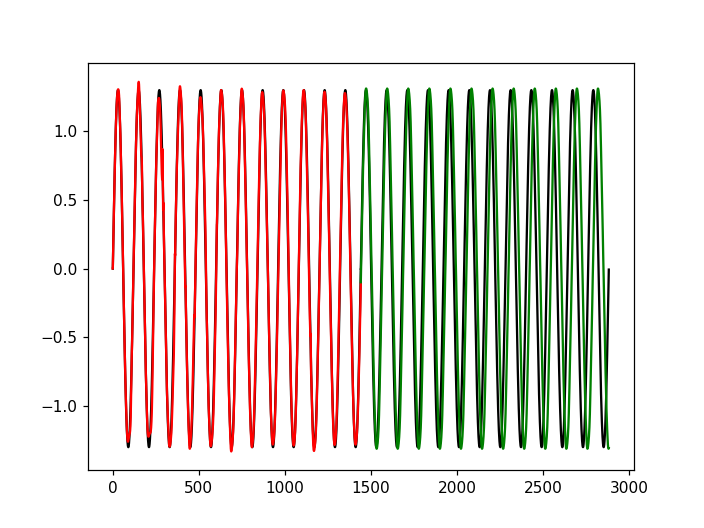

In [172]:

zt = np.zeros([1, simtime.size])
zpt = np.zeros([1, simtime.size])
# x0 = 0.5 * np.random.normal(0,1,[N,1])
# z0 = 0.5 * np.random.normal(0,1,[1,1])
x0 = 0.5 * np.random.uniform(0,1,[N,1])
z0 = 0.5 * np.random.uniform(0,1,[1,1])

x = x0
r = np.tanh(x)
z = z0

P = np.identity(N) * (1 / alpha)

wo = np.zeros([1, nREc2Out])
ti = 0
for t in simtime:
    x = (1 - dt) * x + np.dot(M, r * dt) + wf * (z * dt)
    
    
    
    z = np.dot(wo,r)
    
    Pr = np.dot(P, r)
    k = np.transpose(Pr)/(1 + np.dot(np.transpose(r), Pr))
    P = P - np.dot(Pr,k)
    
    e = z - ft[ti]
    
    wo = wo - e * k
    r = np.tanh(x)
    zt[0,ti] = z
    ti += 1

ti = 0
r = np.tanh(x);
for t in simtime2:
    x = (1 - dt) * x + np.dot(M, r * dt) + wf * (z * dt)
    r = np.tanh(x)
    z = np.dot(wo,r)

    zpt[0,ti] = z
    ti += 1
    
plt.figure()
plt.plot(simtime, ft,'k')
plt.plot(simtime,np.transpose(zt),'r')

plt.plot(simtime2, ft2,'k')
plt.plot(simtime2, np.transpose(zpt),'g')
plt.show()



    